In [1]:
#
%run ./connectors.ipynb
%run ./my_utils.ipynb

/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_33026/1435207182.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=127259169819-6jg2fe7gb3mgpj4kog72t599c26uekat.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A54238%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform&state=376jPcPsEVycK72nSiUX3F9Rvqsnvs&access_type=offline


<>:6: SyntaxWarning: invalid escape sequence '\.'
/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_33026/1242829460.py:6: SyntaxWarning: invalid escape sequence '\.'
  df[column].str.replace("\..*", "", regex=True) if df[column].dtype == 'object' else df[column],


In [23]:
#####import datasets######

kpi = load_sql('get_query_kpi96.sql')
cum_sum = load_sql('get_query_cumsum_new.sql')
bets = load_sql('get_query_bets.sql')


df_kpi_96 = client.query(kpi).to_dataframe()
df_cum_sum_30d = client.query(cum_sum).to_dataframe()
df_bets = client.query(bets).to_dataframe()

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [79]:
df_bets.sort_values(by='days_of_activity', ascending=False)

,user_id,days_of_activity,first_purchase_date,max_bet_amt,min_bet_amount,max_win_amt,avg_rounds_bet,avg_bet_amt,max_daily_games_unique,sum_bonus_promotion_bet_amount
0,121308,5,2024-01-04 00:31:27.695000+00:00,16.0,0.05,109.48,796.400000,401.040,24,0.0
84434,5046,5,2023-11-09 18:22:26.712000+00:00,2.0,0.05,179.25,574.666667,282.400,7,0.0
20095,804790,5,2024-09-05 02:40:38.392000+00:00,1.6,0.20,54.00,100.000000,117.300,2,0.0
84387,2331,5,2024-04-08 21:17:11.488000+00:00,60.0,0.05,87.20,144.000000,154.575,7,0.0
84389,175001,5,2024-01-31 06:24:40.611000+00:00,6.0,0.10,375.00,968.600000,2226.910,7,0.0
...,...,...,...,...,...,...,...,...,...,...
14959,482927,1,2024-06-26 00:56:30.441000+00:00,0.4,0.20,7.20,50.000000,13.800,1,0.0
14960,509689,1,2024-06-26 02:53:27.276000+00:00,1.0,1.00,4.00,13.000000,13.000,1,0.0
95627,859238,1,2024-09-21 13:09:05.680000+00:00,2.0,0.20,16.98,102.000000,82.900,9,0.0
95626,929740,1,2024-09-24 20:35:49.358000+00:00,1.5,0.25,19.60,348.000000,213.600,9,0.0


In [294]:
df_overview = df_kpi_96.copy()

In [296]:
user_ids = df_cum_sum_30d['user_id'].unique()
days_range = range(51)
new_rows = pd.MultiIndex.from_product([user_ids, days_range], names=['user_id', 'days_since_first_purchase']).to_frame(index=False)

# Merge this DataFrame with the original DataFrame
df_full_range = pd.merge(new_rows, df_cum_sum_30d, on=['user_id', 'days_since_first_purchase'], how='left')

# Fill missing cum_sum values using the last available value
df_full_range['cum_sum'] = df_full_range.groupby('user_id')['cum_sum'].fillna(method='ffill')
df_full_range['daily_total'] = df_full_range.groupby('user_id')['daily_total'].fillna(method='ffill')

# Compute the sum of daily_total for each user_id and days_since_first_purchase
# Assuming `daily_total` is a column in df_cum_sum_30d
daily_total_sum = df_cum_sum_30d.groupby(['user_id', 'days_since_first_purchase'])['daily_total'].sum().reset_index()

# Merge this daily_total_sum DataFrame with df_full_range
df_full_range = pd.merge(df_full_range, daily_total_sum, on=['user_id', 'days_since_first_purchase'], how='left')

# Sort the DataFrame if needed
df_full_range = df_full_range.sort_values(by=['user_id', 'days_since_first_purchase'])

# Select the columns you need
df_full_range_mapped = df_full_range[['user_id', 'days_since_first_purchase', 'cum_sum', 'daily_total_x']]

/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_33026/2739934086.py:9: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_full_range['cum_sum'] = df_full_range.groupby('user_id')['cum_sum'].fillna(method='ffill')
/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_33026/2739934086.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_full_range['cum_sum'] = df_full_range.groupby('user_id')['cum_sum'].fillna(method='ffill')
/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_33026/2739934086.py:10: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single v

In [297]:
df_full_range_mapped_30d = df_full_range_mapped[df_full_range_mapped['days_since_first_purchase'] <= 30]

In [298]:
####label the values #####

df_exceeds = df_full_range_mapped_30d[df_full_range_mapped_30d['cum_sum'] > 1000]

# Step 2: Get the first row for each user_id where cum_sum exceeds 1000
df_first_exceeds = df_exceeds.groupby('user_id').first().reset_index()

# Step 3: For user_ids where no cum_sum exceeds 1000, get the last row
df_last = df_full_range_mapped_30d[~df_full_range_mapped_30d['user_id'].isin(df_first_exceeds['user_id'])]
df_last = df_last.groupby('user_id').last().reset_index()

# Step 4: Combine the results
df_result = pd.concat([df_first_exceeds, df_last]).sort_values(by=['user_id'])


df_result['flag'] = df_result.apply(lambda x: 1 if x['cum_sum'] > 1000 else 0, axis=1)
df_result = df_result[['user_id','days_since_first_purchase', 'cum_sum', 'flag']]

df_result_merged = pd.merge(df_result, first_purchase_feature, on='user_id')

df_result_merged = pd.merge(df_result_merged, day_of_activity, on='user_id').rename(columns={'days_since_first_purchase_y' : 'days_of_activity'})

In [302]:
df_result_merged.drop(['days_since_first_purchase_x','cum_sum'], axis=1, inplace=True)

In [304]:
#create dummies profile features

top_email_domain = df_overview['signup_email_domain'].value_counts()[0:4].index
top_channel = df_overview['channel'].value_counts()[0:4].index
platform = df_overview['signup_platform'].str.lower().value_counts()[0:].index
geo_loc = df_overview['first_geo_region'].str.lower().value_counts()[0:5].index

In [306]:
df_overview[['signup_email_domain','channel','first_geo_region','signup_platform']] = df_overview[[
    'signup_email_domain','channel','first_geo_region','signup_platform']].fillna(0)

In [308]:
df_overview['signup_date'] = pd.to_datetime(df_overview['signup_date'])
df_overview['first_purchase_date'] = pd.to_datetime(df_overview['first_purchase_date'])

# Calculate the difference in minutes
df_overview['time_diff_minutes'] = (df_overview['first_purchase_date'] - df_overview['signup_date']).dt.total_seconds() / 3600

In [310]:
fill_max_t = df_overview['time_diff_minutes'].max()
df_overview['time_diff_minutes'] = df_overview['time_diff_minutes'].fillna(fill_max_t)

In [312]:
#avg_spin_amt
df_overview[['avg_spin_amt','rtp_ratio']] = df_overview[['avg_spin_amt','rtp_ratio']].fillna(0)

In [314]:
df_enc = df_overview.merge(df_bets, on='user_id', how='left')

In [316]:
zero_value =['max_bet_amt', 'min_bet_amount', 'max_win_amt', 'avg_rounds_bet',
       'avg_bet_amt', 'max_daily_games_unique','sum_bonus_promotion_bet_amount','days_of_activity']

df_enc[zero_value] = df_enc[zero_value].fillna(0)

In [318]:
df_enc = df_enc.rename(columns={'first_purchase_date_x' : 'first_purchase_date'})
df_enc = df_enc.drop('first_purchase_date_y', axis=1)
df_enc['first_purchase_date'] = df_enc['first_purchase_date'].dt.date

In [320]:
# Assuming df_overview is your DataFrame
null_columns = df_enc.columns[df_enc.isnull().any()]

null_columns

Index([], dtype='object')

In [322]:
######create dummy variables profile features#####

#email_domain

df_enc["signup_email_domain"] = np.where(df_enc["signup_email_domain"].isin(top_email_domain),
                                 df_enc["signup_email_domain"].str.replace("\..*", "", regex = True), "other")

df_enc = pd.get_dummies(data = df_enc,
                           columns = ["signup_email_domain"],
                           dtype = int)


#channel
df_enc["channel"] = np.where(df_enc["channel"].isin(top_channel),
                                  df_enc["channel"].str.replace("\..*", "", regex = True), "other")

df_enc = pd.get_dummies(data = df_enc,
                           columns = ["channel"],
                           dtype = int)


#first_geo_region

df_enc["first_geo_region"] = np.where(df_enc["first_geo_region"].isin(geo_loc),
                                           df_enc["first_geo_region"].str.replace("\..*", "", regex = True), "other")

df_enc = pd.get_dummies(data = df_enc,
                           columns = ["first_geo_region"],
                           dtype = int)


#signup_platform

df_enc["signup_platform"] = np.where(df_enc["signup_platform"].isin(platform),
                                           df_enc["signup_platform"].str.replace("\..*", "", regex = True), "other")

df_enc = pd.get_dummies(data = df_enc,
                           columns = ["signup_platform"],
                           dtype = int)

<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:15: SyntaxWarning: invalid escape sequence '\.'
<>:25: SyntaxWarning: invalid escape sequence '\.'
<>:35: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:15: SyntaxWarning: invalid escape sequence '\.'
<>:25: SyntaxWarning: invalid escape sequence '\.'
<>:35: SyntaxWarning: invalid escape sequence '\.'
/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_33026/4083362701.py:6: SyntaxWarning: invalid escape sequence '\.'
  df_enc["signup_email_domain"].str.replace("\..*", "", regex = True), "other")
/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_33026/4083362701.py:15: SyntaxWarning: invalid escape sequence '\.'
  df_enc["channel"].str.replace("\..*", "", regex = True), "other")
/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_33026/4083362701.py:25: SyntaxWarning: invalid escape sequence '\.'
  df_enc["first_geo_region"].str.replace("\..*", "", regex = True)

In [374]:
# Change column names to lower case
df_enc.columns = df_enc.columns.str.lower()

In [324]:
epsilon = 1e-10

df_enc['ln_total_bet_amt'] = np.log(df_enc['total_bet_amt'] + epsilon)
df_enc['ln_total_win_amt_sc'] = np.log(df_enc['total_win_amt_sc'] + epsilon)
df_enc['ln_total_win_amt_cc'] = np.log(df_enc['total_win_amt_cc'] + epsilon)
df_enc['ln_sum_redeem_amt'] = np.log(df_enc['sum_redeem_amt'] + epsilon)
df_enc['ln_sum_amt_total'] = np.log(df_enc['sum_amt_total'] + epsilon)
df_enc['ln_sum_redeem_amt'] = np.log(df_enc['sum_redeem_amt'] + epsilon)
df_enc['ln_sum_sc_coin_total'] = np.log(df_enc['sum_sc_coin_total'] + epsilon)

In [326]:
df_enc = df_enc.drop(['total_bet_amt','total_win_amt_sc','total_win_amt_cc','sum_redeem_amt','sum_amt_total','sum_redeem_amt','sum_sc_coin_total'],
            axis=1)

In [408]:
df_merged_final_model = df_enc.copy()

In [410]:
df_merged_final_model_mg = pd.merge(df_merged_final_model,df_result_merged, on='user_id')

In [412]:
df_merged_final_model_mg = df_merged_final_model_mg.rename(columns={'days_of_activity_x' : 'days_of_activity'})
df_merged_final_model_mg = df_merged_final_model_mg.drop('days_of_activity_y',axis=1)
df_merged_final_model_mg.columns = df_merged_final_model_mg.columns.str.lower()

In [414]:
####split data taining, validation, test####

# To avoid leakage, arrange sets by time
# 1) Training from 2023-11-01 to 2024-03-31
# 2) Test from 2024-04-01 to 2024-05-31
# 3) Out of time from 2024-06-01 to 2024-08-15

model_set = "2023-11-01"
oot_start = "2024-08-05"


In [416]:
df_merged_final_model_mg['first_purchase_date'].max()

datetime.date(2024, 8, 19)

In [418]:
df_merged_final_model_mg['first_purchase_date'] = pd.to_datetime(df_merged_final_model_mg['first_purchase_date'])

In [420]:
df_merged_final_model_mg["model_set"] = (
    (df_merged_final_model_mg["first_purchase_date"] >= model_set) &
    (df_merged_final_model_mg["first_purchase_date"] < oot_start)
)

df_merged_final_model_mg["set_type"] = np.where(df_merged_final_model_mg["model_set"],"model_set", "oot_set")


In [422]:
df_merged_final_model_mg['set_type'].value_counts()

set_type
model_set    78497
oot_set      13288
Name: count, dtype: int64

In [424]:
##features label of the model ###

non_features = [
    'user_id',
    'signup_date',
    'first_purchase_date',
     'model_set',
     'flag',
     'cum_sum',
     'set_type']

feature_list = [c for c in df_merged_final_model_mg.columns if c not in non_features]

In [426]:

corr_matrix = df_merged_final_model_mg[feature_list].corr()

# Step 2: Find Pairs with Correlation > 0.8 or < -8
mask = (corr_matrix.abs() > 0.9) & (corr_matrix.abs() < 1)
high_corr_pairs = mask.stack()
high_corr_pairs = high_corr_pairs[high_corr_pairs]

# Step 3: Create a set to keep track of features to drop
to_drop = set()

# Create a dictionary to store high correlation pairs
correlation_dict = {}
for (i, j) in high_corr_pairs.index:
    if i not in to_drop and j not in to_drop:
        correlation_dict[(i, j)] = corr_matrix.at[i, j]
        # Add one feature to the drop set (you can choose to drop either `i` or `j`)
        to_drop.add(j)  # Drop j; you can change this to `i` if preferred

print("High Correlation Pairs (>|0.9|):")
print(correlation_dict)

# Create a list of features to be omitted based on high correlation
list_omitted_features = list(to_drop)

# Create the new feature list, omitting the features in `list_omitted_features`
new_features = [c for c in feature_list if c not in list_omitted_features]

print("New Feature List:")
print(new_features)


High Correlation Pairs (>|0.9|):
{('signup_platform_app', 'signup_platform_web'): -0.9999999999999993}
New Feature List:
['avg_spin_amt', 'rtp_ratio', 'ggr_amt', 'logins_first_96h', 'total_bet_txn', 'max_purchase_amt_horly', 'max_redeem_amt_hourly', 'sum_redeem_txn', 'cnt_txn_total', 'sum_spin_sc', 'sum_spin_cc', 'max_eod_sc_balance', 'sum_bonus_wheel', 'sum_bonus_plinko', 'sum_offer_amt', 'sum_bonus_amt', 'sum_daily_mission', 'sum_leaderboard_reward', 'time_diff_minutes', 'days_of_activity', 'max_bet_amt', 'min_bet_amount', 'max_win_amt', 'avg_rounds_bet', 'avg_bet_amt', 'max_daily_games_unique', 'sum_bonus_promotion_bet_amount', 'signup_email_domain_gmail', 'signup_email_domain_icloud', 'signup_email_domain_other', 'signup_email_domain_privaterelay', 'signup_email_domain_yahoo', 'channel_app', 'channel_invite friend', 'channel_facebook', 'channel_google', 'channel_other', 'first_geo_region_other', 'signup_platform_app', 'ln_total_bet_amt', 'ln_total_win_amt_sc', 'ln_total_win_amt_cc'

In [430]:
columns_to_convert = ['total_bet_txn', 'sum_redeem_txn', 'cnt_txn_total', 'logins_first_96h', 'sum_spin_sc',
                      'sum_spin_cc','days_of_activity','first_purchase_amt']
df_merged_final_model_mg[columns_to_convert] = df_merged_final_model_mg[columns_to_convert].astype('float64')

In [432]:
df_merged_final_model_mg = trim_outliers_quantile(df_merged_final_model_mg, feature_list)

In [434]:
columns_to_select = new_features + ['flag','set_type'] 

df_merged_final_model_f = df_merged_final_model_mg[columns_to_select]

In [436]:
df_merged_final_model_f_all = df_merged_final_model_f[df_merged_final_model_f['set_type'] == 'model_set']
df_merged_final_model_f_oot = df_merged_final_model_f[df_merged_final_model_f['set_type'] == 'oot_set']

df_merged_final_model_f_all.drop('set_type', axis=1, inplace=True)
df_merged_final_model_f_oot.drop('set_type', axis=1, inplace=True)

/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_33026/63176192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_final_model_f_all.drop('set_type', axis=1, inplace=True)
/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_33026/63176192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_final_model_f_oot.drop('set_type', axis=1, inplace=True)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:45:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

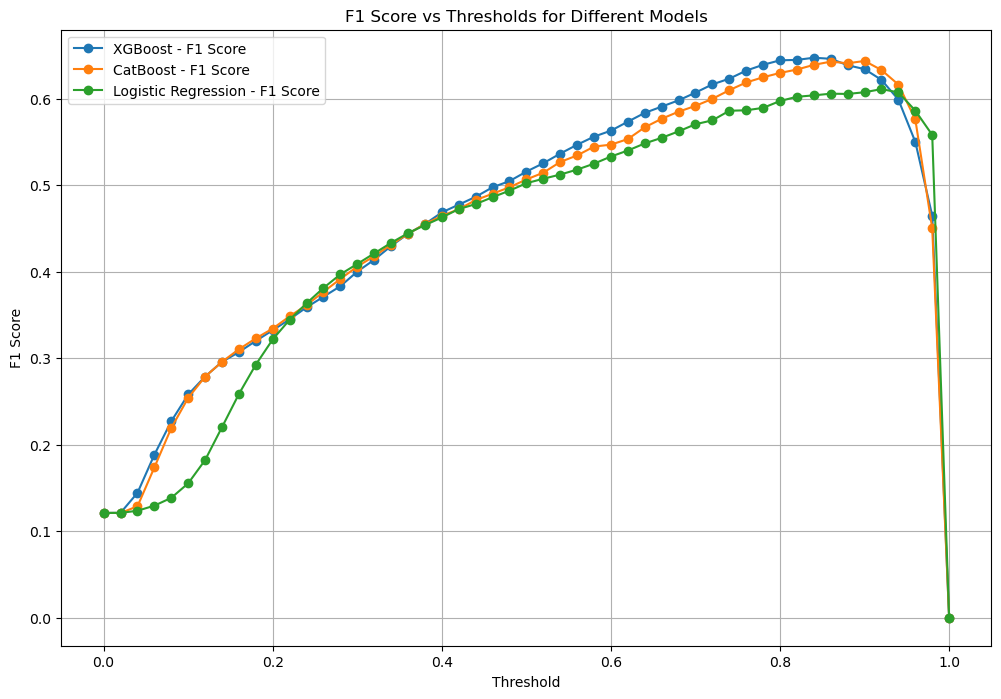


Metrics at different thresholds:
                   Model  Threshold  Accuracy  Precision    Recall  F1 Score
0                XGBoost       0.00  0.064459   0.064459  1.000000  0.121111
1                XGBoost       0.02  0.065987   0.064557  1.000000  0.121285
2                XGBoost       0.04  0.240318   0.077822  0.994071  0.144343
3                XGBoost       0.06  0.451975   0.104171  0.987154  0.188455
4                XGBoost       0.08  0.573121   0.128590  0.973320  0.227168
..                   ...        ...       ...        ...       ...       ...
148  Logistic Regression       0.92  0.953694   0.666278  0.564229  0.611022
149  Logistic Regression       0.94  0.955096   0.696041  0.538538  0.607242
150  Logistic Regression       0.96  0.955478   0.731167  0.489130  0.586146
151  Logistic Regression       0.98  0.956624   0.812854  0.424901  0.558079
152  Logistic Regression       1.00  0.935541   0.000000  0.000000  0.000000

[153 rows x 6 columns]


In [438]:
# Assuming df_merged_final_model_f_all is your dataset and is already loaded

# Define features and target
X = df_merged_final_model_f_all.drop(columns=['flag'])
y = df_merged_final_model_f_all['flag']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Calculate class weights based on the training set
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=5,
    reg_lambda=10,
    scale_pos_weight=class_weights[1] / class_weights[0],  # Adjust based on class imbalance
    use_label_encoder=False,
    early_stopping_rounds=10,
    eval_metric='logloss'
)

# Fit XGBoost model
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Initialize CatBoost model
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.01,
    depth=5,
    l2_leaf_reg=10,
    class_weights=class_weight_dict,  # Use the same class weights
    eval_metric='Logloss',
    early_stopping_rounds=10,
    verbose=False
)

# Fit CatBoost model
catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)

# Initialize Logistic Regression model
logreg_model = LogisticRegression(
    solver='lbfgs',
    class_weight='balanced',  # Automatically adjusts weights based on class distribution
    max_iter=500
)

# Fit Logistic Regression model
logreg_model.fit(X_train, y_train)

# Evaluate models on test set
models = {'XGBoost': xgb_model, 'CatBoost': catboost_model, 'Logistic Regression': logreg_model}
results = []

for model_name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    thresholds = [i / 100 for i in range(0, 101, 2)]
    
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        results.append({
            'Model': model_name,
            'Threshold': threshold,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot metrics vs thresholds for each model
plt.figure(figsize=(12, 8))

for model_name in results_df['Model'].unique():
    model_data = results_df[results_df['Model'] == model_name]
    plt.plot(model_data['Threshold'], model_data['F1 Score'], label=f'{model_name} - F1 Score', marker='o')

plt.title("F1 Score vs Thresholds for Different Models")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.show()

# Display the results
print("\nMetrics at different thresholds:")
print(results_df)



In [440]:
results_df[results_df['Threshold'] > 0.8]

,Model,Threshold,Accuracy,Precision,Recall,F1 Score
41,XGBoost,0.82,0.953822,0.639456,0.650198,0.644782
42,XGBoost,0.84,0.955924,0.668421,0.627470,0.647299
43,XGBoost,0.86,0.957707,0.701389,0.598814,0.646055
44,XGBoost,0.88,0.958981,0.738961,0.562253,0.638608
45,XGBoost,0.90,0.960382,0.783430,0.532609,0.634118
46,XGBoost,0.92,0.961083,0.832504,0.496047,0.621672
47,XGBoost,0.94,0.960828,0.880998,0.453557,0.598826
48,XGBoost,0.96,0.959045,0.942446,0.388340,0.550035
49,XGBoost,0.98,0.954968,0.993528,0.303360,0.464799
50,XGBoost,1.00,0.935541,0.000000,0.000000,0.000000


In [442]:
with open('xgb_model_v1_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [444]:
# Prepare the features for prediction (drop the 'flag' column)
X_oot = df_merged_final_model_f_oot.drop(columns=['flag'])

# Make predictions (probabilities) using CatBoost model
y_oot_proba = xgb_model.predict_proba(X_oot)[:, 1]  # Get probabilities for the positive class

# Apply the threshold to convert probabilities to binary outcomes
threshold = 0.92
y_oot_pred = (y_oot_proba >= threshold).astype(int)

# Optionally, you can add these predictions back to the DataFrame to keep track of them
df_merged_final_model_f_oot['predicted_label'] = y_oot_pred

# Display or use the DataFrame as needed
df_merged_final_model_f_oot


/var/folders/52/16l8f4r11n1b1bthpmm5505w0000gn/T/ipykernel_33026/3874097489.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_final_model_f_oot['predicted_label'] = y_oot_pred


,avg_spin_amt,rtp_ratio,ggr_amt,logins_first_96h,total_bet_txn,max_purchase_amt_horly,max_redeem_amt_hourly,sum_redeem_txn,cnt_txn_total,sum_spin_sc,...,signup_platform_app,ln_total_bet_amt,ln_total_win_amt_sc,ln_total_win_amt_cc,ln_sum_redeem_amt,ln_sum_amt_total,ln_sum_sc_coin_total,first_purchase_amt,flag,predicted_label
0,1.561,0.447,-61.0,2.0,71.00,23.99,0.0,0.0,1.0,2.0,...,0,4.709530,3.891820,-23.025851,-23.025851,3.177637,4.094345,23.99,0,0
1,0.500,0.835,-111.0,11.0,1352.00,21.98,0.0,0.0,5.0,9.0,...,1,6.517671,6.336826,8.389360,-23.025851,3.969348,4.356709,4.99,0,0
2,0.580,0.867,-144.0,14.0,1860.00,49.99,0.0,0.0,2.0,8.0,...,0,6.984716,6.841615,16.348977,-23.025851,4.303795,4.718499,23.99,0,0
3,3.043,0.944,-1468.0,29.0,10268.76,399.98,0.0,0.0,12.0,29.0,...,0,9.972602,9.941263,-23.025851,-23.025851,7.369452,7.426549,23.99,1,1
4,2.000,0.225,-62.0,1.0,40.00,23.99,0.0,0.0,1.0,1.0,...,0,4.382027,2.890372,-23.025851,-23.025851,3.177637,4.094345,23.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91702,0.289,0.926,-25.0,3.0,1177.00,5.99,0.0,0.0,1.0,3.0,...,0,5.831882,5.752573,-23.025851,-23.025851,1.790091,2.890372,5.99,0,0
91711,0.207,0.876,-53.0,5.0,2082.00,14.99,0.0,0.0,1.0,4.0,...,0,6.068426,5.937536,14.492833,-23.025851,2.707383,3.806662,14.99,0,0
91735,0.103,0.790,-10.0,7.0,483.00,4.99,0.0,0.0,1.0,5.0,...,0,3.912023,3.663562,-23.025851,-23.025851,1.607436,1.609438,4.99,0,0
91745,0.377,0.543,-23.0,14.0,132.00,5.99,0.0,0.0,1.0,4.0,...,0,3.912023,3.295837,9.615805,-23.025851,1.790091,2.890372,5.99,0,0


In [446]:
df_merged_final_model_f_oot.groupby(['predicted_label','flag'])['flag'].count()

predicted_label  flag
0                0       12332
                 1         437
1                0          85
                 1         434
Name: flag, dtype: int64

In [289]:
# Save DataFrame to a CSV file
df_merged_final_model_f_oot.to_csv('df_merged_final_model_f_oot_predictions.csv', index=False)

In [382]:
# Save the X variables to a .txt file
with open('debugging_X_var.txt', 'w') as file:
    for column in X.columns:
        file.write(f"{column}\n")